In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
#import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
import os
from plotly.offline import iplot, init_notebook_mode
from scipy import stats

In [2]:
# Import our mental health dataset and create a dataframe
mental_df = pd.read_csv('./Resources/mental-heath-in-tech-2016_20161114.csv')
mental_df.head()

Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                1.0              

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                    Not eligible for coverage / N/A                                  
1                                                 No                                  
2                                                 No                                  
3                                                NaN                                  
4                                                Yes                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                NaN                                                
1                                                Yes                                                
2                                                NaN                                                
3                                                NaN                                                
4                                                Yes                                                

  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                 No                                                                                       
1                                                Yes                                                                                       
2                                                 No                                                                                       
3                                                NaN                                                                                       
4                                                 No                                                                                       

  Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                 No                                                            
1                                                Yes                                                            
2                                                 No                                                            
3                                                NaN                                                            
4                                                 No                                                            

  Is your anonymi

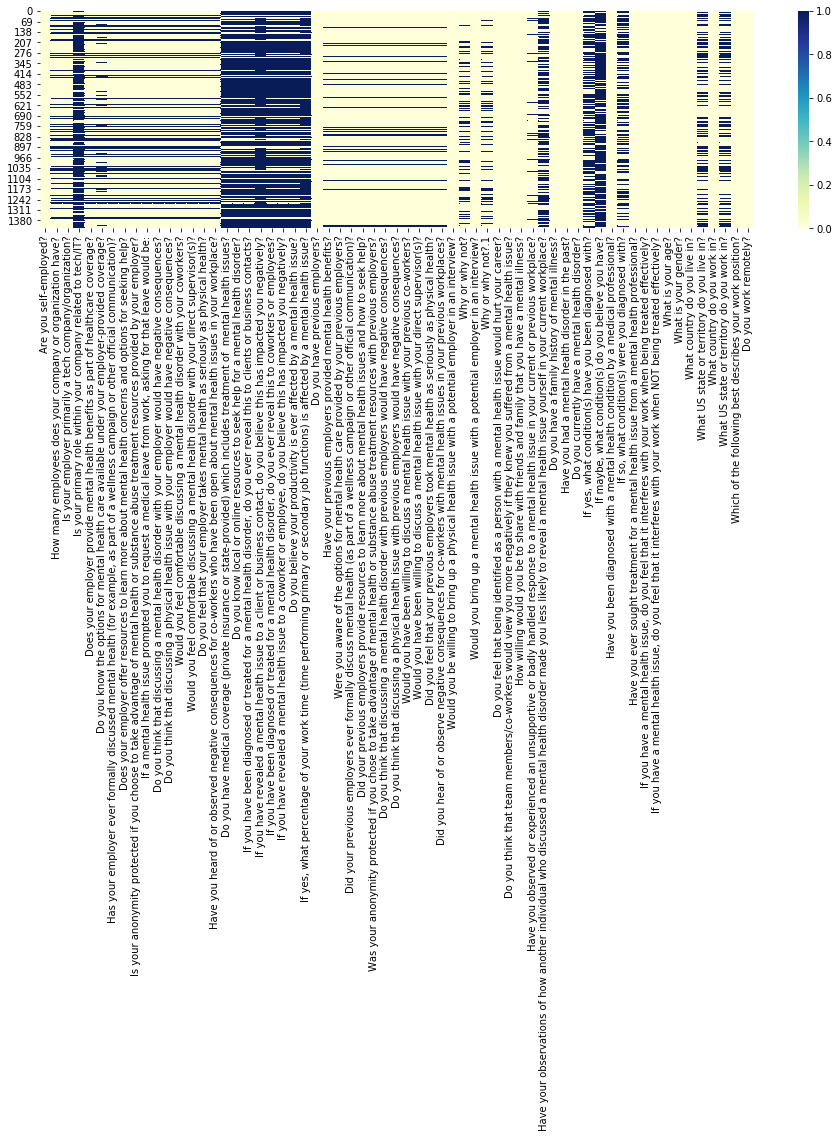

In [3]:
# Missing values visualisation
plt.figure(figsize = (16,4))
sns.heatmap(data = mental_df.isna(), cmap="YlGnBu");

In [4]:
def generate_missing_value_heatmap(mental_df):
    val_array = np.array(mental_df.fillna(-70).values)
    val_array[np.where(val_array != -70)] = 0
    val_array[np.where(val_array == -70)] = 1
    
    data = [
        go.Heatmap(
            z=val_array,
            x=mental_df.columns,
            y=mental_df.index,
            colorscale="Blues",
            hovertemplate="Question: %{x}\n Missing?: %{z}"
        )
    ]
    
    layout = go.Layout(
    title=dict(text="Missing Data Heatmap (Blue Values Indicate Missing).",
              font=dict(size=20)),
    autosize = True,
    xaxis=dict(
        showticklabels=False, 
        ticks="", 
        showgrid=False,
        zeroline=False,
        automargin=False,
        tickmode='array',
    ),
    yaxis=dict(
        autorange=True,
        tickmode='array',
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks="",
        automargin=False,
        showticklabels=False),
    )
    
    fig = dict(data=data, layout=layout)
    
    return fig

In [5]:
iplot(generate_missing_value_heatmap(mental_df))

In [6]:
# Import our mental health dataset and create a dataframe
cleaned_df = pd.read_csv('./Resources/cleaned_data.csv')
cleaned_df.head()

Unnamed: 0  \
0           1   
1           4   
2           5   
3           6   
4           7   

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                 No                                  
1                                                Yes                                  
2                                                Yes                                  
3                                       I don't know                                  
4                                                Yes                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                Yes                                                
1                                                Yes                                                
2                                      I am not sure                                                
3                                                 No                                                
4                                                Yes                                                

  Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                Yes                                                            
1                                                 No                                                            
2                                                Yes                                                            
3                                                 No                                                            
4                                                Yes                                                            

  If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
0                                      Somewhat easy                                                            
1                         Neither easy nor difficult                                                            
2                                      Somewhat easy                                                            
3                                      Somewhat easy                                                            
4                                          Very easy                                                            

  Do you think that discussing a mental health disorder with your employer would have negative consequences?  \
0                                                 No                                                           
1                                                Yes                                                           
2                                                Yes                                                           
3                                                 No                                                           
4                                                 No                                                           

  Do you think that discussing a physical health issue with your employer would have negative consequences?  \
0                                                 No                                                          
1                                              Maybe                                                          
2                                                Yes                                                          
3                                                 No                                                          
4                                                 No                                                          

  Do you feel that your employer takes mental health as seriously as phy

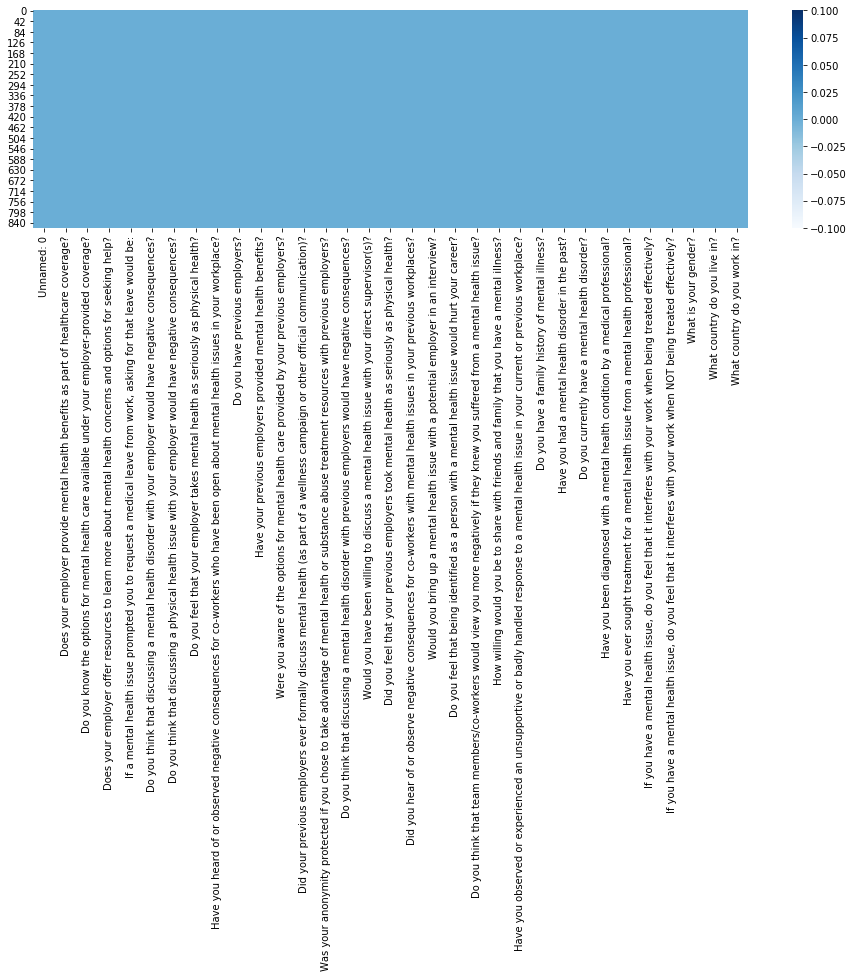

In [7]:
# Missing values visualisation
plt.figure(figsize = (16,4))
sns.heatmap(data = cleaned_df.isna(), cmap="Blues");

In [8]:
# Check for low response rate columns < 70% response rate
low_response_columns = []
for column in mental_df.columns:
    if ((mental_df[column].count() / 1433) < .7):
        low_response_columns.append(column)

# display a list of low response columns
low_response_columns

['Is your primary role within your company related to tech/IT?',
 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
 'Do you know local or online resources to seek help for a mental health disorder?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
 'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
 'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
 'Do you believe your productivity is ever affected by a mental health issue?',
 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
 'Ha

In [9]:
# drop low response columns
mental_df.drop(columns=low_response_columns, inplace=True)

# check the new size of the dataframe
mental_df.shape

(1433, 48)

In [10]:
# Check for many distinct answers indicating long for response or irrelavant data
many_distinct_columns = []
for column in mental_df.columns:
    if (mental_df[column].nunique() > 10):
        many_distinct_columns.append(column)
    

many_distinct_columns.remove('What is your age?')
many_distinct_columns.remove('What country do you live in?')
many_distinct_columns.remove('What country do you work in?')
many_distinct_columns.remove('What is your gender?')



many_distinct_columns

['Why or why not?',
 'Why or why not?.1',
 'Which of the following best describes your work position?']

In [11]:
# drop many distinct answers columns
mental_df.drop(columns=many_distinct_columns, inplace=True)

# see the new size of the dataframe
mental_df.shape

(1433, 45)

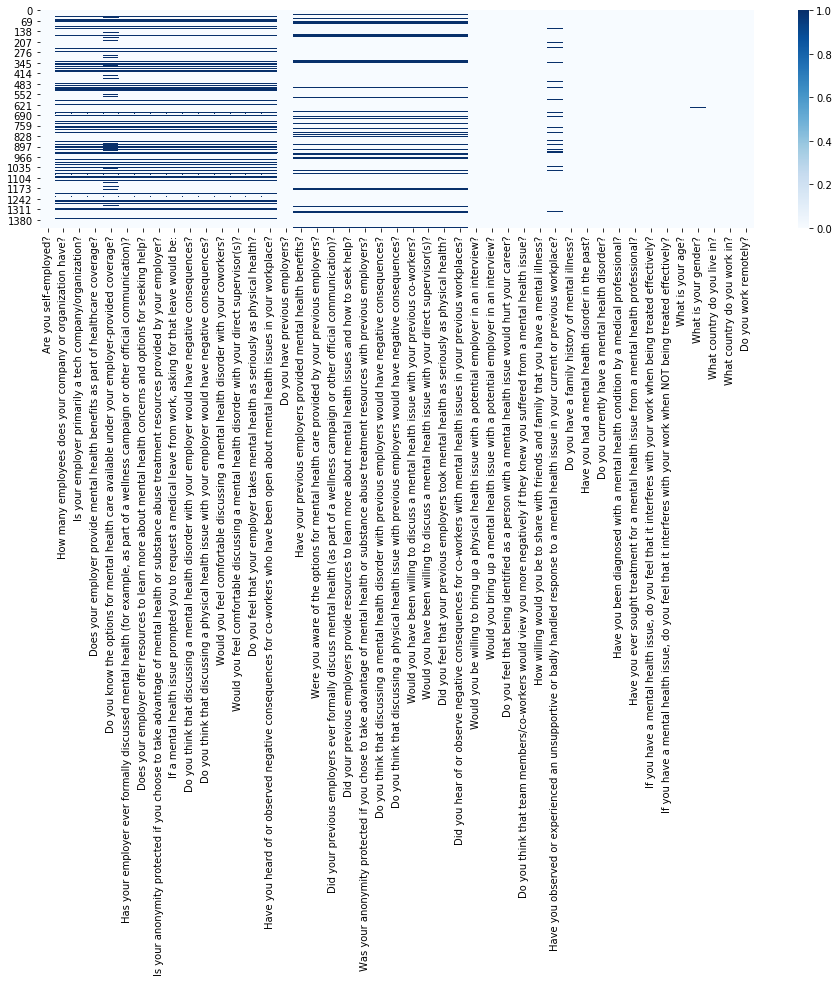

In [12]:
# Missing values visualisation
plt.figure(figsize = (16,4))
sns.heatmap(data = mental_df.isna(), cmap="Blues");

In [13]:
# function for comparing two columns with a chi-square-test

def chi_square(column):
    crosstab = pd.crosstab(mental_df['Have you been diagnosed with a mental health condition by a medical professional?'], mental_df[column])
    return stats.chi2_contingency(crosstab)[1]

In [14]:
# run chi-square test and drop non significant columns

insignificant_p_columns = []
for column in mental_df.columns:
    p_value = chi_square(column)
    if p_value >= .05:
        insignificant_p_columns.append(column)
        
insignificant_p_columns

['Are you self-employed?',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'Would you feel comfortable discussing a mental health disorder with your coworkers?',
 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
 'Did your previous employers provide resources to learn more about mental health issues and how to seek help?',
 'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
 'Would you have been willing to discuss a mental health issue with your previous co-workers?',
 'Would you be willing to bring up a physical health 

In [15]:
# drop insignificant p value columns
mental_df.drop(columns=insignificant_p_columns, inplace=True)
mental_df.shape

(1433, 32)

In [17]:
# rename the columns in the dataframe to numbers
column_rename = {}
count = 0
for column in mental_df.columns:
    
    column_rename[column] = count
    count = count + 1
    
    
column_rename

renamed_df = mental_df.rename(columns=column_rename)
renamed_df

0              1    2   \
0     Not eligible for coverage / N/A            NaN   No   
1                                  No            Yes  Yes   
2                                  No            NaN   No   
3                                 NaN            NaN  NaN   
4                                 Yes            Yes   No   
...                               ...            ...  ...   
1428                              NaN            NaN  NaN   
1429                              NaN            NaN  NaN   
1430                              Yes            Yes  Yes   
1431                     I don't know  I am not sure  Yes   
1432                              Yes             No   No   

                              3      4      5             6    7   8   \
0                      Very easy     No     No  I don't know   No   1   
1                  Somewhat easy     No     No           Yes   No   1   
2     Neither easy nor difficult  Maybe     No  I don't know   No   1   
3                            NaN    NaN    NaN           NaN  NaN   1   
4     Neither easy nor difficult    Yes  Maybe            No   No   1   
...                          ...    ...    ...           ...  ...  ..   
1428                         NaN    NaN    NaN           NaN  NaN   1   
1429                         NaN    NaN    NaN           NaN  NaN   0   
1430          Somewhat difficult  Maybe  Maybe  I don't know  Yes   1   
1431          Somewhat difficult  Maybe     No            No   No   1   
1432              Very difficult  Maybe     No            No   No   0   

                     9   ...            22     23     24   25 26  \
0          No, none did  ...            No    Yes     No  Yes  0   
1     Yes, they all did  ...           Yes    Yes    Yes  Yes  1   
2          No, none did  ...            No  Maybe     No   No  1   
3              Some did  ...            No    Yes    Yes  Yes  1   
4          I don't know  ...           Yes    Yes    Yes  Yes  1   
...                 ...  ...           ...    ...    ...  ... ..   
1428  Yes, they all did  ...           Yes     No     No   No  1   
1429                NaN  ...           Yes     No     No  Yes  0   
1430           Some did  ...           Yes    Yes  Maybe  Yes  1   
1431       No, none did  ...           Yes  Maybe    Yes  Yes  0   
1432                NaN  ...  I don't know    Yes    Yes   No  0   

                        27                    28          29  \
0     Not applicable to me  Not applicable to me        Male   
1                   Rarely             Sometimes        male   
2     Not applicable to me  Not applicable to me       Male    
3                Sometimes             Sometimes        male   
4                Sometimes             Sometimes      Female   
...                    ...                   ...         ...   
1428  Not applicable to me  Not applicable to me     Female    
1429             Sometimes                 Often        MALE   
1430                Rarely             Sometimes        Male   
1431             Sometimes                 Often      Female   
1432  Not applicable to me                 Often  non-binary   

                            30                        31  
0               United Kingdom            United Kingdom  
1     United States of America  United States of America  
2               United Kingdom            United Kingdom  
3               United Kingdom            United Kingdom  
4     United States of America  United States of America  
...                        ...                       ...  
1428  United States of America  United States of America  
1429  United States of America               Afghanistan  
1430  United States of America  United States of America  
1431  United States of America  United States of America  
1432                    Canada                    Canada  

[1433 rows x 32 columns]

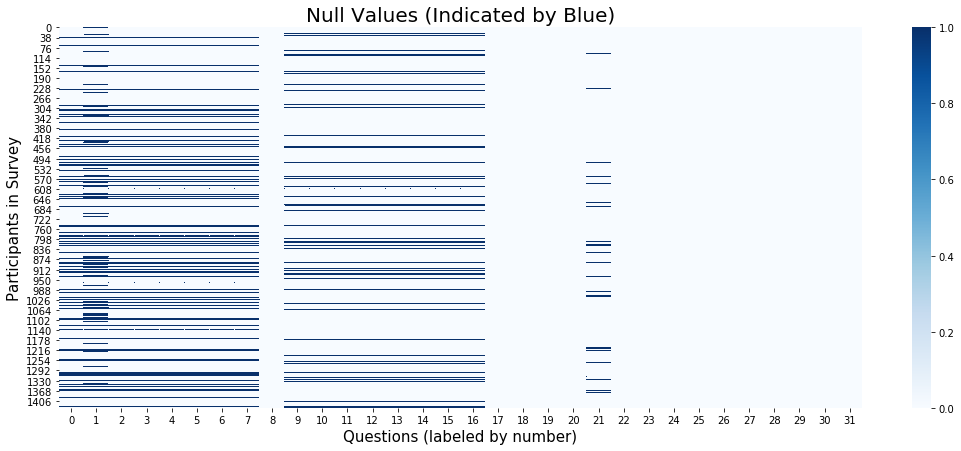

In [32]:
# Missing values visualisation
plt.figure(figsize = (18,7))
ax = plt.axes()
sns.heatmap(data = renamed_df.isna(), cmap="Blues");

plt.title('Null Values (Indicated by Blue)', fontsize = 20) # title with fontsize 20
plt.xlabel('Questions (labeled by number)', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Participants in Survey', fontsize = 15)

plt.show()